In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Adding the outputs of logic gates into a table

In [2]:
logic_gates = {'A':[0,0,1,1],'B':[0,1,0,1],'AND':[0,0,0,1],'OR':[0,1,1,1],'NAND':[1,1,1,0],'NOR':[1,0,0,0],'XOR':[0,1,1,0],'XNOR':[1,0,0,1]}
table = pd.DataFrame(data = logic_gates,columns=['A','B','AND','OR','NAND','NOR','XOR','XNOR'],index=[1,2,3,4])
print(table)

   A  B  AND  OR  NAND  NOR  XOR  XNOR
1  0  0    0   0     1    1    0     1
2  0  1    0   1     1    0    1     0
3  1  0    0   1     1    0    1     0
4  1  1    1   1     0    0    0     1


# defining and initializing the weights and biases for each neuron

In [ ]:
layer_1_w = tf.Variable(tf.random_normal([2,2]))
layer_1_b = tf.Variable(tf.random_normal([2,1]))
layer_2_w = tf.Variable(tf.random_normal([1,2]))
layer_2_b = tf.Variable(.15)

# Defining mean square error

In [4]:
err = 0
for a,b,c in zip(table['A'],table['B'],table['XOR']):
    output_l1 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1_w,[[float(a)],[float(b)]]),layer_1_b))
    output_l2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_2_w,output_l1),layer_2_b))
    err += (output_l2-c)**2 

# some useful variables

In [66]:
opt = tf.train.GradientDescentOptimizer(learning_rate=.1)
tran = opt.minimize(err)
ex = np.linspace(-.1,1.1,100)
ey = np.linspace(-.1,1.1,100)
ez_1 = np.zeros([100,100],float)
ez_2 = np.zeros([100,100],float)
ez_3 = np.zeros([100,100],float)
params = []

# Training and Predicting 

In [6]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    training_steps = 10000
    for i in range(training_steps):
        sess.run(tran)
    print("error:{0}".format(sess.run(err)))
    for a,b,c in zip(table['A'],table['B'],table['XOR']):
        output_l1 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1_w,[[float(a)],[float(b)]]),layer_1_b))
        output_l2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_2_w,output_l1),layer_2_b))
        print('A:{0} B:{1} C:{2} pred:{3}'.format(a,b,c,sess.run(output_l2)))
    params.append([sess.run([layer_1_w,layer_1_b,layer_2_w,layer_2_b])])


error:[[0.00384084]]
A:0 B:0 C:0 pred:[[0.02721136]]
A:0 B:1 C:1 pred:[[0.9706274]]
A:1 B:0 C:1 pred:[[0.97045475]]
A:1 B:1 C:0 pred:[[0.03694203]]


## ANALYSIS OF PARAMETERS

Lets plot the output for each point in plane

In [7]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [8]:
def predict(x):
    l1 = sigmoid(np.dot(params[0][0][0],x)+params[0][0][1])
    l2 = sigmoid(np.dot(params[0][0][2],l1)+params[0][0][3])
    Neuron = {'N1':l1[0][0],'N2':l1[1][0],'N3':l2[0][0]}
    return Neuron['N1'],Neuron['N2'],Neuron['N3']

In [9]:
for i in range(100):
    for j in range(100):
        ez_1[i][j],ez_2[i][j],ez_3[i][j] = predict([[ex[i]],[ex[j]]])
        zz[i][j] = i+j

let's dig deeper and ask "What are the individual outputs of each neuron?"

## Neuron 1 output

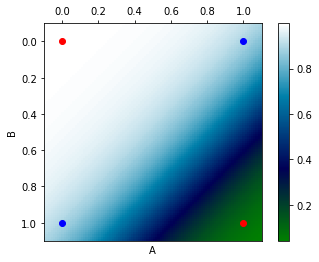

In [28]:
plt.imshow(ez_1,interpolation='nearest' , cmap=plt.cm.ocean, extent=(-.1,1.1,1.1,-.1))
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True
plt.xlabel('A')
plt.ylabel('B')
plt.plot([0,1],[0,1],'ro',label='0')
plt.plot([0,1],[1,0],'bo',label='1')
plt.colorbar()
plt.show()    

## Neuron 2 output

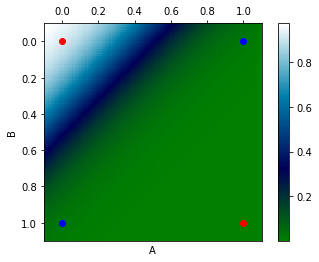

In [27]:
plt.imshow(ez_2,interpolation='nearest' , cmap=plt.cm.ocean,  extent=(-.1,1.1,1.1,-.1))
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True
plt.xlabel('A')
plt.ylabel('B')
plt.plot([0,1],[0,1],'ro',label='0')
plt.plot([0,1],[1,0],'bo',label='1')
plt.colorbar()
plt.show()

## Neuron 3 output

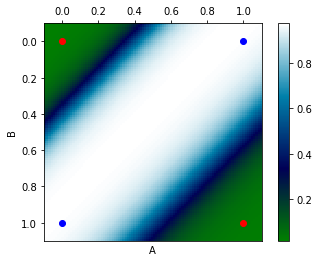

In [26]:
plt.imshow(ez_3, interpolation='nearest' ,cmap=plt.cm.ocean,  extent=(-.1,1.1,1.1,-.1))
plt.xlabel('A')
plt.ylabel('B')
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True
plt.plot([0,1],[0,1],'ro',label='0')
plt.plot([0,1],[1,0],'bo',label='1')
plt.colorbar()
plt.show()

## SOLVED ! 
    

The above graph clearly shows that the points have been classified correctly. Hurray!
<n>
Outputs of each neuron has been rounded off and printed in the next cell for xor gate inputs.

In [42]:
for a,b,c in zip(table['A'],table['B'],table['XOR']):
    node1,node2,node3 = predict([[float(a)],[float(b)]])
    print("A:{0} | B:{1} | C:{2}| neuron_1 -> {3} | neuron_2 -> {4}  | neuron_3 -> {5}".format(a,b,c,round(node1),round(node2),round(node3)))

A:0 | B:0 | C:0| neuron_1 -> 1.0 | neuron_2 -> 1.0  | neuron_3 -> 0.0
A:0 | B:1 | C:1| neuron_1 -> 1.0 | neuron_2 -> 0.0  | neuron_3 -> 1.0
A:1 | B:0 | C:1| neuron_1 -> 1.0 | neuron_2 -> 0.0  | neuron_3 -> 1.0
A:1 | B:1 | C:0| neuron_1 -> 0.0 | neuron_2 -> 0.0  | neuron_3 -> 0.0


Let's see why the outputs of neuron_1 and neuron_2 combine with neuron_3 to produce the right classification. 

In [62]:
print("SIGMOID[(w1 x n1)+(w2 x n2)] + b = output")
for a,b in zip(table['A'],table['B']):
    node1,node2,node3 = predict([[float(a)],[float(b)]])
    print('SIGMOID[({0} x {3}) + ({1} x {4}) + {2}] ~ {5} '.format(params[0][0][2][0][0],params[0][0][2][0][1],params[0][0][3],round(node1),round(node2),round(node3)))
    

SIGMOID[(w1 x n1)+(w2 x n2)] + b = output
SIGMOID[(8.73990917206 x 1.0) + (-8.95556354523 x 1.0) + -4.08445644379] ~ 0.0 
SIGMOID[(8.73990917206 x 1.0) + (-8.95556354523 x 0.0) + -4.08445644379] ~ 1.0 
SIGMOID[(8.73990917206 x 1.0) + (-8.95556354523 x 0.0) + -4.08445644379] ~ 1.0 
SIGMOID[(8.73990917206 x 0.0) + (-8.95556354523 x 0.0) + -4.08445644379] ~ 0.0 


## We can see that neuron_1 and neuron_2 simply approximately divides the plane into two linearly just like a peceptron with a sigmoid activation function. Neuron_3 cleverly adjusts itself. It simply multiplies output of neuron_1 with ~9 and output of neuron_2 by ~ -9 adds them and then subtracts ~4 from it .

## Neuron_1 acts like NAND gate
## Neuron_2 acts like NOR gate
## What does Neuron_3 acts like?

In [65]:
for a,b in zip(table['A'],table['B']):
    out_3 = sigmoid(params[0][0][2][0][0]*float(a) + params[0][0][2][0][1]*float(b) + params[0][0][3])
    print("A:{0} | B:{1} | Neuron_3:{2}".format(a,b,round(out_3)))

A:0 | B:0 | Neuron_3:0.0
A:0 | B:1 | Neuron_3:0.0
A:1 | B:0 | Neuron_3:1.0
A:1 | B:1 | Neuron_3:0.0


## Neuron_3 doesn't act like any logic gate we know. Infact It has created a problem specific gate to deal only with the inputs it receive. If you observe the inputs Neuron_3 receives you will see why it behaves in such a peculiar fashion. 

### |---Neuron_1----|---Neuron_2---|---Neuron_3--|
### |---------1----------|---------1---------|--------0---------|
### |---------1----------|---------0---------|--------1---------|
### |---------1----------|---------0---------|--------1---------|
### |---------0----------|---------0---------|--------0---------|
    

#### the above are the only input it has to deal with. Though each perceptron separates the plane linearly its the architecture that gives it the flexibility to learn non-linear boundaries. One cold connect a million perceptrons end to end and still not solve the problem without the right architecture the problem still may not be solved.

### Though I started out with the idea of finding a way to get the right architecture for a given problem, I feel that the results that I got does not suggest  much in that direction. Here Neuron_1 and Neuron_2 acts as NAND and NOR gates. I don't think this is a unique solution there might be so many problem specific gates that our neurons could have developed to solve the problem. For example the neurons could simply reverse the order and the third neuron could switch the weights and still the solve the XOR problem.

## I am pretty sure that running this code might change the whole parameters of the problem. 

# Feel free to play with the code!!!